<a href="https://colab.research.google.com/github/workjuanmejia/MaestriaIA/blob/main/EntregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VARIABLES, LIBRERÍAS Y BIBLIOTECAS**


---




In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact, t, sem
from google.colab import drive  #Librería usada
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#estandarización del tipo de regimen
mapa_tip_ss = {
    "subsidiado": "subsidiado",
    "contributivo": "contributivo",
    "no afiliado": "no_afiliado",
    "indeterminado/pendiente": "no_afiliado",
    "no asegurado": "no_afiliado",
    "excepcion": "excepcion_especial",
    "especial": "excepcion_especial",
    "excepción": "excepcion_especial"
}

#Estandarización de los meses del año
MES_MAP = {
    "enero":1, "ene":1,
    "febrero":2, "feb":2,
    "marzo":3, "mar":3,
    "abril":4, "abr":4,
    "mayo":5, "mayo":5,
    "junio":6, "jun":6,
    "julio":7, "jul":7,
    "agosto":8, "ago":8,
    "septiembre":9, "setiembre":9, "sep":9, "set":9,
    "octubre":10, "oct":10,
    "noviembre":11, "nov":11,
    "diciembre":12, "dic":12
}

MESES_ES = {
    "ene":"01","enero":"01",
    "feb":"02","febrero":"02",
    "mar":"03","marzo":"03",
    "abr":"04","abril":"04",
    "may":"05","mayo":"05",
    "jun":"06","junio":"06",
    "jul":"07","julio":"07",
    "ago":"08","agosto":"08",
    "sep":"09","sept":"09","set":"09","septiembre":"09",
    "oct":"10","octubre":"10",
    "nov":"11","noviembre":"11",
    "dic":"12","diciembre":"12"
}

# **DATOS DE CALI**


---



In [ ]:
FILE_CALI = "/content/drive/MyDrive/Estadistica/43.-cancer-de-cuello-uterino-d.abiertos-piii-2023-2022-2021.csv" #Archivo que va a leer en la ruta de drive

df_cl = pd.read_csv(FILE_CALI, sep=",",low_memory=False) #Se lee desde un archivo csv con delimitador ,

for col in df_cl.select_dtypes(include="object").columns:
    df_cl[col] = df_cl[col].str.lower()
    df_cl[col] = df_cl[col].str.strip()

df_cl["tip_ss_"] = df_cl["tip_ss_"].replace(mapa_tip_ss)

print(f"[Cali] Filas: {len(df_cl):,} | Columnas: {df_cl.shape[1]}")

#Función para mostrar los tipos de datos
display(pd.DataFrame({
    "Nombre Columna": df_cl.columns,
    "Tipo de Dato": [str(df_cl[c].dtype) for c in df_cl.columns],
    "Valores Unicos": [df_cl[c].nunique(dropna=True) for c in df_cl.columns],
    "Ejemplo de Valores": [df_cl[col].unique()[:5] for col in df_cl.columns],
}))

[Cali] Filas: 883 | Columnas: 21


,Nombre Columna,Tipo de Dato,Valores Unicos,Ejemplo de Valores
0,codigo_sspm,int64,401,"[1, 2, 3, 4, 5]"
1,fec_not,object,391,"[4-ene-23, 6-ene-23, 11-ene-23, 13-ene-23, 10-..."
2,cod_divipola,int64,481,"[76369, 76370, 76371, 76372, 76373]"
3,ciudad,object,1,[cali]
4,dpto,object,1,[valle]
5,edad_,int64,69,"[42, 73, 50, 43, 81]"
6,sexo_,object,1,"[femenino, nan]"
7,tip_ss_,object,4,"[subsidiado, contributivo, no_afiliado, excepc..."
8,per_etn_,object,5,"[otro, afrocolombiano, nan, raizal, rom]"
9,fec_con_,object,438,"[1-sept-22, 4-ene-23, 11-ene-23, 16-may-22, 13..."


# **DATOS DE BOGOTÁ**

---



In [ ]:
FILE_BOGOTA = "/content/drive/MyDrive/Estadistica/morbilidadcamamayccu-1 (1).csv" #Archivo que va a leer

#Esta parte del try;except se hizo por el tipo de idioma usado para que lo tome español latino
try:
    df_bg = pd.read_csv(FILE_BOGOTA, sep=";", low_memory=False, encoding='latin-1')
except UnicodeDecodeError:
    df_bg = pd.read_csv(FILE_BOGOTA, sep=";", low_memory=False, encoding='cp1252')
df_bg["ciudad"] = "Bogotá"

for col in df_bg.select_dtypes(include="object").columns:
    df_bg[col] = df_bg[col].str.lower()
    df_bg[col] = df_bg[col].str.strip()

#estandarizar regimen
df_bg["tip_ss_"] = df_bg["tip_ss_"].replace(mapa_tip_ss)

#seleccionar el tipo de cancer de interes
df_bg = df_bg[df_bg["TIPO_DE_CANCER"] == "2-ca cuello uterino"]

print(f"[Bogotá] Filas: {len(df_bg):,} | Columnas: {df_bg.shape[1]}")

#Función para mostrar los tipos de datos
display(pd.DataFrame({
    "Nombre Columna": df_bg.columns,
    "Tipo de Dato": [str(df_bg[c].dtype) for c in df_bg.columns],
    "Valores Unicos": [df_bg[c].nunique(dropna=True) for c in df_bg.columns],
    "Ejemplo de Valores": [df_bg[col].unique()[:5] for col in df_bg.columns]
}))


[Bogotá] Filas: 18,029 | Columnas: 30


,Nombre Columna,Tipo de Dato,Valores Unicos,Ejemplo de Valores
0,EVENTO,int64,1,[155]
1,ano,int64,10,"[2016, 2019, 2020, 2018, 2021]"
2,tip_ss_,object,4,"[subsidiado, contributivo, excepcion_especial,..."
3,cod_ase_,object,44,"[capital salud, compensar, e.p.s. sanitas, nue..."
4,per_etn_,int64,6,"[6, 1, 5, 2, 4]"
5,nom_grupo_,object,9,"[nan, inga, embera, misak o guambiano, motilon..."
6,estrato_,object,7,"[nan, 3, 2, 1, 4]"
7,gp_discapa,float64,2,"[2.0, nan, 1.0]"
8,gp_desplaz,object,2,"[2, 1, nan]"
9,gp_migrant,float64,2,"[2.0, 1.0, nan]"


# **CONSOLIDACIÓN DE CAMPOS DE LOS DATAFRAMES**


---



In [ ]:

def normaliza_ascii(s):
    return unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")

def parse_fecha_espanol(s):
    if pd.isna(s):
        return pd.NaT
    s = str(s).strip()
    if s == "" or s.lower() == "nan":
        return pd.NaT

    # quito acentos y paso a minúscula
    s_norm = normaliza_ascii(s.lower())

    # elimino el día de la semana + coma
    s_norm = re.sub(r'^[a-z]+,\s*', '', s_norm)

    # buscar patrón "28 de enero de 2016"
    m = re.search(r'(\d{1,2})\s+de\s+([a-z]+)\s+de\s+(\d{4})', s_norm)
    if m:
        d = int(m.group(1))
        mes_txt = m.group(2)
        y = int(m.group(3))
        mes_num = MES_MAP.get(mes_txt, MES_MAP.get(mes_txt[:3]))
        if mes_num:
            return pd.Timestamp(year=y, month=mes_num, day=d)

    return pd.NaT

def parse_date(s):
    # sin infer_datetime_format (deprecado)
    return pd.to_datetime(s, errors="coerce", dayfirst=True)

def parse_fecha_es(x):
    if pd.isna(x):
        return pd.NaT
    try:
        s = str(x).strip().lower()
        # valores tipo "s/d", "na", etc. -> NaT
        if s in {"", "na", "n/a", "sd", "s/d", "null", "none"}:
            return pd.NaT
        # reemplazar nombre de mes por número
        for k,v in MESES_ES.items():
            s = re.sub(rf"\b{k}\b\.?", v, s)  # admite "sept." también
        # separar por -, / o espacio -> dd-mm-yy(yy)
        s = re.sub(r"[\/\s]", "-", s)
        m = re.match(r"^(\d{1,2})-(\d{1,2})-(\d{2,4})$", s)
        if m:
            d, m_, y = m.groups()
            d = d.zfill(2); m_ = m_.zfill(2)
            # expandir año 2 dígitos
            if len(y)==2:
                y = "20"+y if int(y) <= 30 else "19"+y
            iso = f"{y}-{m_}-{d}"
            return pd.to_datetime(iso, errors="coerce")
        # último intento por si ya quedó parseable
        return pd.to_datetime(s, errors="coerce", dayfirst=True)
    except TypeError:
        # Catch the specific TypeError and return NaT
        return pd.NaT


# -----------------
# Bogotá
# -----------------
bog = pd.DataFrame()
bog["ciudad"]    = df_bg['ciudad']
bog["ano"]      = df_bg["ano"]
bog["estrato"]   = df_bg["estrato_"]
bog["regimen"]   = df_bg["tip_ss_"]
bog["etnia"]     = df_bg["nom_grupo_"]
bog["fecha_examen"] = df_bg["fec_toma_e"].apply(parse_fecha_espanol)
bog["fecha_diag"]   = df_bg["fec_res_ex"].apply(parse_fecha_espanol)
bog["territorio"]   = df_bg["LOCALIDAD_RESIDENCIA"]
bog["edad"]         = pd.to_numeric(df_bg["EDAD_"], errors="coerce")
bog["sexo"]         = df_bg["SEXO"]

# -----------------
# Cali
# -----------------
cll = pd.DataFrame()
cll["ciudad"]    = df_cl["ciudad"]
cll["ano"]      = parse_date(df_cl["fec_toma_e"]).dt.year
cll["estrato"]   = df_cl["codigo_sspm"]   # No está en este dataset
cll["regimen"]   = df_cl["tip_ss_"]
cll["etnia"]     = df_cl["per_etn_"]
# Convert to string before applying the parsing function
cll["fecha_examen"] = df_cl["fec_toma_e"].astype(str).apply(parse_fecha_es)
cll["fecha_diag"]   = df_cl["fec_con_"].astype(str).apply(parse_fecha_es)
cll["territorio"]   = df_cl["ciudad"]   # solo ciudad, no comuna
cll["edad"]         = pd.to_numeric(df_cl["edad_"], errors="coerce")
cll["sexo"]         = df_cl["sexo_"]



#Formato fecha Cali
cll["fecha_examen"] = pd.to_datetime(cll["fecha_examen"], errors="coerce", dayfirst=True)
cll["fecha_diag"]   = pd.to_datetime(cll["fecha_diag"], errors="coerce", dayfirst=True)

cll["estrato"] = (cll["estrato"]
                 .astype(str)
                 .str.extract(r"(\d)")
                 .astype(float))

# 2. Calcular media SOLO para valores válidos (entre 1 y 6)
media_estrato_cali = cll.loc[cll["estrato"].between(1, 6), "estrato"].mean()
media_estrato_cali = round(media_estrato_cali)

#si el valor del estrato es mayor a 6 se le asigna el valor de la media para no alterar la distribucion de los datos
cll["estrato"] = cll["estrato"].apply(
    lambda x: media_estrato_cali if pd.notna(x) and (x < 1 or x > 6) else x
)



#Formato fecha Bogota
bog["fecha_examen"] = pd.to_datetime(bog["fecha_examen"], errors="coerce", dayfirst=True)
bog["fecha_diag"]   = pd.to_datetime(bog["fecha_diag"], errors="coerce", dayfirst=True)

bog["estrato"] = (bog["estrato"]
                 .astype(str)
                 .str.extract(r"(\d)")
                 .astype(float))

# 2. Calcular media SOLO para valores válidos (entre 1 y 6)
media_estrato_bog= bog.loc[bog["estrato"].between(1, 6), "estrato"].mean()
media_estrato_bog = round(media_estrato_bog)

#si el valor del estrato es mayor a 6 se le asigna el valor de la media para no alterar la distribucion de los datos
bog["estrato"] = bog["estrato"].apply(
    lambda x: media_estrato_bog if pd.notna(x) and (x < 1 or x > 6) else x
)

display(cll.head())
display(bog.head())

print(media_estrato_cali)
print(media_estrato_bog)
cll.info()
bog.info()

/tmp/ipython-input-677695800.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(s, errors="coerce", dayfirst=True)


,ciudad,ano,estrato,regimen,etnia,fecha_examen,fecha_diag,territorio,edad,sexo
0,cali,NaN,1.0,subsidiado,otro,2022-08-23,2022-09-01,cali,42,femenino
1,cali,NaN,2.0,contributivo,otro,2022-12-02,2023-01-04,cali,73,femenino
2,cali,NaN,3.0,subsidiado,otro,2022-12-13,2023-01-11,cali,50,femenino
3,cali,2022.0,4.0,contributivo,otro,2022-03-30,2022-05-16,cali,73,femenino
4,cali,2022.0,5.0,contributivo,otro,2022-11-24,2023-01-13,cali,43,femenino


,ciudad,ano,estrato,regimen,etnia,fecha_examen,fecha_diag,territorio,edad,sexo
0,bogotá,2016,NaN,subsidiado,NaN,2016-01-21,2016-01-28,22 - sin dato,21,mujeres
1,bogotá,2016,NaN,subsidiado,NaN,2016-04-20,2016-05-05,22 - sin dato,20,mujeres
2,bogotá,2016,NaN,subsidiado,NaN,2016-09-19,2016-09-23,22 - sin dato,28,mujeres
3,bogotá,2016,NaN,subsidiado,NaN,2016-09-24,2016-09-30,22 - sin dato,52,mujeres
4,bogotá,2016,NaN,subsidiado,NaN,2016-11-02,2016-11-09,22 - sin dato,25,mujeres


2
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ciudad        883 non-null    object        
 1   ano           618 non-null    float64       
 2   estrato       883 non-null    float64       
 3   regimen       883 non-null    object        
 4   etnia         882 non-null    object        
 5   fecha_examen  883 non-null    datetime64[ns]
 6   fecha_diag    883 non-null    datetime64[ns]
 7   territorio    883 non-null    object        
 8   edad          883 non-null    int64         
 9   sexo          482 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 69.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 18029 entries, 0 to 35548
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   

# **MÉTRICA DE LOS TIEMPOS DE ESPERA EN DÍAS**


---



Función para IC: añadir una función para calcular el IC de la media.

El resultado en términos generales, los tiempos de espera promedio muestran una clara desigualdad entre las dos ciudades. En Cali, con una muestra de 622 casos válidos, el tiempo medio de espera entre el examen y el diagnóstico fue de 76 días, con un intervalo de confianza al 95% que oscila entre 61,7 y 90,9 días. En contraste, en Bogotá, con 18.019 registros, el tiempo promedio de espera fue de apenas 12 días, con un intervalo mucho más estrecho entre 11,1 y 12,9 días.     

Esto sugiere que, en promedio, las pacientes en Cali enfrentan demoras sustancialmente mayores en comparación con las de Bogotá.


In [ ]:
#Tiempo de espera en días Cali
cll["tiempo_espera_dias"] = (cll["fecha_diag"] - cll["fecha_examen"]).dt.days

#Filtro datos de Cali por filas donde esten las fechas de diagnostico y el examen
cll_filtrado = cll[(cll["fecha_examen"].notna()) &
              (cll["fecha_diag"].notna()) &
              (cll["fecha_diag"] >= cll["fecha_examen"])].copy()

#Tiempo de espera en días Bogotá
bog["tiempo_espera_dias"] = (bog["fecha_diag"] - bog["fecha_examen"]).dt.days

#Filtro datos de Cali por filas donde esten las fechas de diagnostico y el examen
bog_filtrado = bog[(bog["fecha_examen"].notna()) &
              (bog["fecha_diag"].notna()) &
              (bog["fecha_diag"] >= bog["fecha_examen"])].copy()

display(cll_filtrado.head())
display(bog_filtrado.head())
cll_filtrado.info()
bog_filtrado.info()

,ciudad,ano,estrato,regimen,etnia,fecha_examen,fecha_diag,territorio,edad,sexo,tiempo_espera_dias
0,cali,NaN,1.0,subsidiado,otro,2022-08-23,2022-09-01,cali,42,femenino,9
1,cali,NaN,2.0,contributivo,otro,2022-12-02,2023-01-04,cali,73,femenino,33
2,cali,NaN,3.0,subsidiado,otro,2022-12-13,2023-01-11,cali,50,femenino,29
3,cali,2022.0,4.0,contributivo,otro,2022-03-30,2022-05-16,cali,73,femenino,47
4,cali,2022.0,5.0,contributivo,otro,2022-11-24,2023-01-13,cali,43,femenino,50


,ciudad,ano,estrato,regimen,etnia,fecha_examen,fecha_diag,territorio,edad,sexo,tiempo_espera_dias
0,bogotá,2016,NaN,subsidiado,NaN,2016-01-21,2016-01-28,22 - sin dato,21,mujeres,7.0
1,bogotá,2016,NaN,subsidiado,NaN,2016-04-20,2016-05-05,22 - sin dato,20,mujeres,15.0
2,bogotá,2016,NaN,subsidiado,NaN,2016-09-19,2016-09-23,22 - sin dato,28,mujeres,4.0
3,bogotá,2016,NaN,subsidiado,NaN,2016-09-24,2016-09-30,22 - sin dato,52,mujeres,6.0
4,bogotá,2016,NaN,subsidiado,NaN,2016-11-02,2016-11-09,22 - sin dato,25,mujeres,7.0


<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 882
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ciudad              733 non-null    object        
 1   ano                 516 non-null    float64       
 2   estrato             733 non-null    float64       
 3   regimen             733 non-null    object        
 4   etnia               733 non-null    object        
 5   fecha_examen        733 non-null    datetime64[ns]
 6   fecha_diag          733 non-null    datetime64[ns]
 7   territorio          733 non-null    object        
 8   edad                733 non-null    int64         
 9   sexo                378 non-null    object        
 10  tiempo_espera_dias  733 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 68.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 18016 entries, 0 to 35548
Data columns (total

/tmp/ipython-input-2170804951.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_plot = df_plot.groupby("ciudad", group_keys=False).apply(


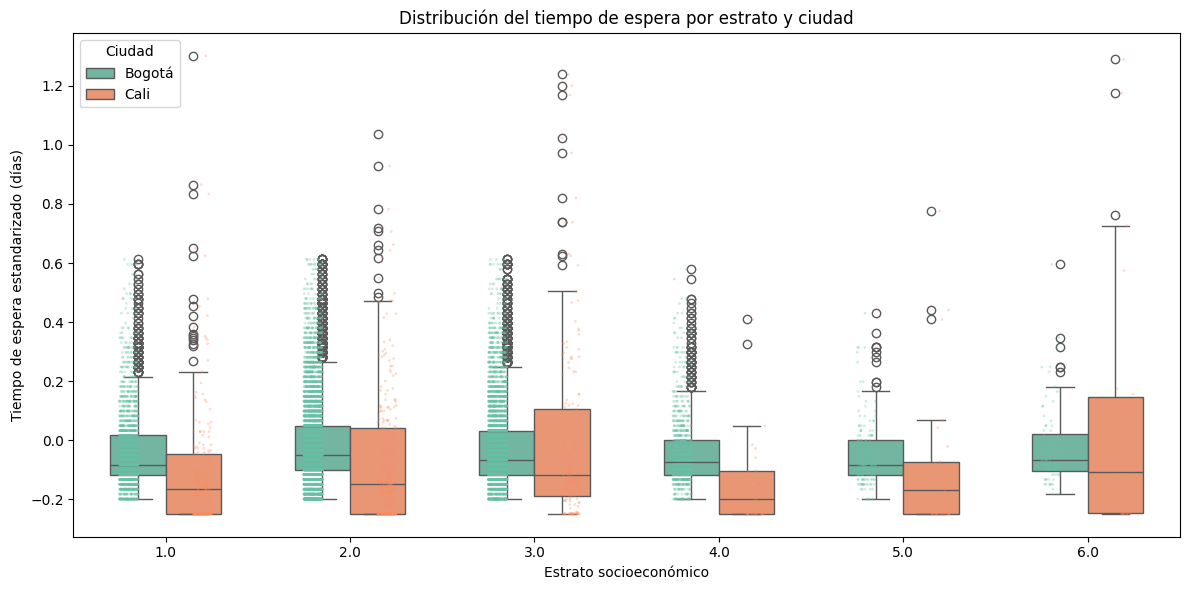

In [ ]:
# toma de examen → resultado de examen para ambas ciudades

# --- Unir datos de Cali y Bogotá ---
scaler = StandardScaler()
cll_filtrado_std = cll_filtrado.copy()
cll_filtrado_std['tiempo_espera_dias_std'] = scaler.fit_transform(cll_filtrado_std[['tiempo_espera_dias']])

bog_filtrado_std = bog_filtrado.copy()
bog_filtrado_std['tiempo_espera_dias_std'] = scaler.fit_transform(bog_filtrado_std[['tiempo_espera_dias']])

cll_plot = cll_filtrado_std[["estrato","tiempo_espera_dias_std"]].copy()
cll_plot["ciudad"] = "Cali"

bog_plot = bog_filtrado_std[["estrato","tiempo_espera_dias_std"]].copy()
bog_plot["ciudad"] = "Bogotá"

df_plot = pd.concat([cll_plot, bog_plot], ignore_index=True)

# Asegurar estrato numérico
df_plot["estrato"] = pd.to_numeric(df_plot["estrato"], errors="coerce")
df_plot = df_plot.dropna(subset=["estrato"])

# --- Recorte en percentil 99 por ciudad ---
df_plot = df_plot.groupby("ciudad", group_keys=False).apply(
    lambda g: g[g["tiempo_espera_dias_std"] <= np.percentile(g["tiempo_espera_dias_std"].dropna(), 99)]
)

# --- Boxplot con stripplot ---
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_plot,
    x="estrato",
    y="tiempo_espera_dias_std",
    hue="ciudad",
    showfliers=True,
    width=0.6,
    palette="Set2"
)

sns.stripplot(
    data=df_plot,
    x="estrato",
    y="tiempo_espera_dias_std",
    hue="ciudad",
    dodge=True,
    alpha=0.3,
    size=2,
    jitter=True,
    palette="Set2"
)

plt.title("Distribución del tiempo de espera por estrato y ciudad")
plt.xlabel("Estrato socioeconómico")
plt.ylabel("Tiempo de espera estandarizado (días)")

# Ajustar leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title="Ciudad")

plt.tight_layout()
plt.show()

# **INTERVALOS DE CONFIANZA**


---


ANOVA
Kruskal-Wallis
post hoc Tukey y Dunn

/tmp/ipython-input-3551160049.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[g["tiempo_espera_dias"] <=


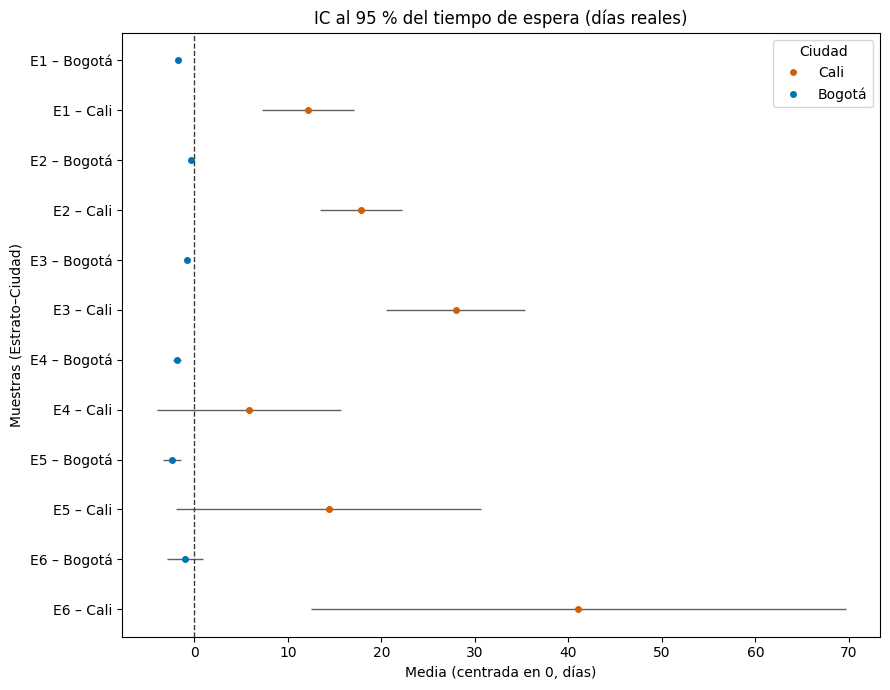

   estrato  ciudad     n      media     ic_inf     ic_sup         x0  \
0        1  Bogotá  2167   9.819566   9.488247  10.150885  -1.765685   
1        1    Cali   204  23.720588  18.832773  28.608403  12.135337   
2        2  Bogotá  7547  11.179277  10.992137  11.366416  -0.405974   
3        2    Cali   276  29.434783  25.029969  33.839597  17.849532   
4        3  Bogotá  5310  10.761770  10.543889  10.979651  -0.823481   
5        3    Cali   164  39.524390  32.065887  46.982894  27.939139   
6        4  Bogotá   984   9.736789   9.277527  10.196050  -1.848462   
7        4    Cali    29  17.413793   7.547715  27.279871   5.828542   
8        5  Bogotá   182   9.186813   8.178776  10.194850  -2.398438   
9        5    Cali    26  25.961538   9.650233  42.272844  14.376287   

          lo         hi  fila  
0  -2.097004  -1.434366     1  
1   7.247522  17.023152     2  
2  -0.593114  -0.218835     3  
3  13.444718  22.254346     4  
4  -1.041362  -0.605600     5  
5  20.480636  3

In [ ]:
# Parámetros
alpha = 0.05          # IC 95%
recortar_p99 = True   # recorte de outliers por ciudad
centrar_en_media_global = True  # centra en 0 como referencia global

# Preparar datos
df = pd.concat([
    cll_filtrado.assign(ciudad="Cali")[["estrato","tiempo_espera_dias","ciudad"]],
    bog_filtrado.assign(ciudad="Bogotá")[["estrato","tiempo_espera_dias","ciudad"]]
], ignore_index=True)

df["estrato"] = pd.to_numeric(df["estrato"], errors="coerce")
df = df.dropna(subset=["estrato","tiempo_espera_dias"])

if recortar_p99:
    df = (df.groupby("ciudad", group_keys=False)
            .apply(lambda g: g[g["tiempo_espera_dias"] <=
                               np.percentile(g["tiempo_espera_dias"].dropna(), 99)])
            .reset_index(drop=True))

# Tabla medias e IC por (estrato, ciudad)
rows = []
for (e, c), g in df.groupby(["estrato","ciudad"], sort=True):
    x = g["tiempo_espera_dias"].dropna().astype(float)
    n = len(x)
    if n == 0:
        continue
    m = x.mean()
    h = sem(x) * t.ppf(1 - alpha/2, n-1) if n > 1 else np.nan
    rows.append({"estrato": int(e), "ciudad": c, "n": n,
                 "media": m, "ic_inf": m - h, "ic_sup": m + h})
tbl = pd.DataFrame(rows).sort_values(["estrato","ciudad"]).reset_index(drop=True)

# Centrar en media global (opcional)
media_global = df["tiempo_espera_dias"].mean()
if centrar_en_media_global:
    tbl["x0"] = tbl["media"] - media_global
    tbl["lo"] = tbl["ic_inf"] - media_global
    tbl["hi"] = tbl["ic_sup"] - media_global
    x_label = "Media (centrada en 0, días)"
else:
    tbl["x0"], tbl["lo"], tbl["hi"] = tbl["media"], tbl["ic_inf"], tbl["ic_sup"]
    x_label = "Tiempo medio de espera (días)"

# Forest plot
fig, ax = plt.subplots(figsize=(9,7))

tbl["fila"] = np.arange(len(tbl)) + 1
colors = {"Cali":"#d55e00", "Bogotá":"#0072B2"}

for _, r in tbl.iterrows():
    ax.hlines(y=r["fila"], xmin=r["lo"], xmax=r["hi"],
              color="#606060", linewidth=1)
    ax.plot(r["x0"], r["fila"], "o",
            color=colors[r["ciudad"]], markersize=4)

ax.axvline(0 if centrar_en_media_global else media_global,
           color="#3b3b3b", linestyle="--", linewidth=1)

ax.set_title(f"IC al {int((1-alpha)*100)} % del tiempo de espera (días reales)")
ax.set_xlabel(x_label)
ax.set_ylabel("Muestras (Estrato–Ciudad)")
ax.set_yticks(tbl["fila"])
ax.set_yticklabels([f"E{e} – {c}" for e, c in zip(tbl["estrato"], tbl["ciudad"])])
ax.invert_yaxis()

leg_elems = [plt.Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[c],
                        markersize=6, label=c) for c in ["Cali","Bogotá"]]
ax.legend(handles=leg_elems, title="Ciudad", loc="best")
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print(tbl.head(10))




In [ ]:


# Preparar datos
# Seleccionamos solo las columnas relevantes
cali = cll_filtrado_std[["estrato", "tiempo_espera_dias_std"]].copy()
bog  = bog_filtrado_std[["estrato", "tiempo_espera_dias_std"]].copy()

# Aseguramos que estrato sea numérico
cali["estrato"] = pd.to_numeric(cali["estrato"], errors="coerce")
bog["estrato"]  = pd.to_numeric(bog["estrato"], errors="coerce")

#  Función para pruebas
def prueba_anova_kruskal(df, ciudad):
    print(f"\n--- {ciudad} ---")
    grupos = [g["tiempo_espera_dias_std"].dropna().values
              for _, g in df.groupby("estrato") if len(g) > 1]

    # ANOVA (paramétrica)
    f_stat, p_anova = stats.f_oneway(*grupos)
    print(f"ANOVA: F={f_stat:.3f}, p={p_anova:.5f}")

    # Kruskal-Wallis (no paramétrica)
    h_stat, p_kruskal = stats.kruskal(*grupos)
    print(f"Kruskal-Wallis: H={h_stat:.3f}, p={p_kruskal:.5f}")

#  Ejecutar
prueba_anova_kruskal(cali, "Cali")
prueba_anova_kruskal(bog, "Bogotá")



--- Cali ---
ANOVA: F=0.859, p=0.50853
Kruskal-Wallis: H=25.364, p=0.00012

--- Bogotá ---
ANOVA: F=1.187, p=0.31256
Kruskal-Wallis: H=96.532, p=0.00000


# **CÁLCULOS**


---



In [ ]:
#Resumen estadistico Cali con el tiempo de espera
resumen_Cali = cll_filtrado.groupby("ciudad")["tiempo_espera_dias"].describe()

#Resumen estadistico Bogotá con el tiempo de espera
resumen_Bog = bog_filtrado.groupby("ciudad")["tiempo_espera_dias"].describe()

# Concatenar ambos resúmenes del tiempo de espera
resumen_total = pd.concat([resumen_Cali, resumen_Bog])

# Reordenar columnas si quieres
cols = ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
resumen_total = resumen_total[cols]

# Imprimir unido
print(resumen_total.round(2))

          count  mean     std  min  25%   50%   75%     max
ciudad                                                     
cali      733.0  39.3  158.16  0.0  0.0  17.0  43.0  4018.0
bogotá  18016.0  12.0   60.45  0.0  5.0   8.0  14.0  7317.0


In [ ]:
#resumen estrato Cali
resumen_estrato_cali = cll_filtrado.groupby(["ciudad","estrato"]).agg(
    n=("tiempo_espera_dias","count"),
    espera_prom=("tiempo_espera_dias","mean"),
    espera_mediana=("tiempo_espera_dias","median")).reset_index()

print(resumen_estrato_cali)

#resumen estrato Bogotá
resumen_estrato_bogota = bog_filtrado.groupby(["ciudad","estrato"]).agg(
    n=("tiempo_espera_dias","count"),
    espera_prom=("tiempo_espera_dias","mean"),
    espera_mediana=("tiempo_espera_dias","median")).reset_index()

print(resumen_estrato_bogota)

  ciudad  estrato    n  espera_prom  espera_mediana
0   cali      1.0  204    23.720588            13.5
1   cali      2.0  281    49.576512            16.0
2   cali      3.0  167    44.856287            21.0
3   cali      4.0   29    17.413793             8.0
4   cali      5.0   26    25.961538            13.0
5   cali      6.0   26    52.653846            22.5
   ciudad  estrato     n  espera_prom  espera_mediana
0  bogotá      1.0  2193    10.839945             7.0
1  bogotá      2.0  7622    13.297035             9.0
2  bogotá      3.0  5357    11.358410             8.0
3  bogotá      4.0   989    10.248736             8.0
4  bogotá      5.0   182     9.186813             7.0
5  bogotá      6.0    77    11.194805             8.0


# **LOS HISTOGRAMAS Y LOS GRÁFICOS QQNORM**

---





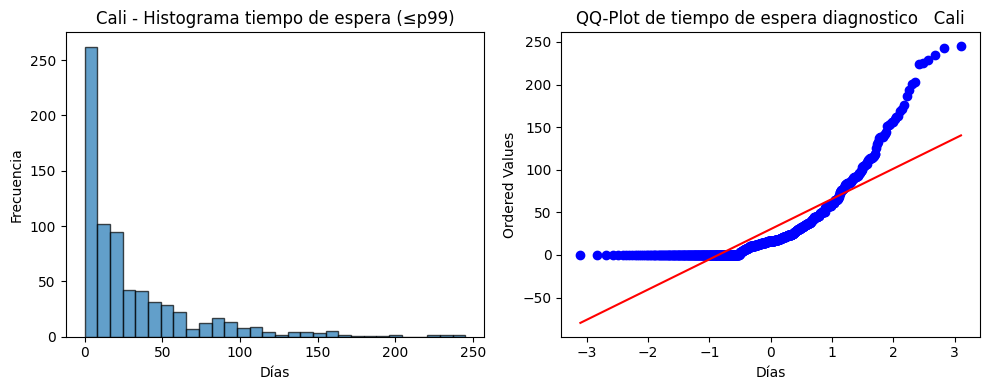

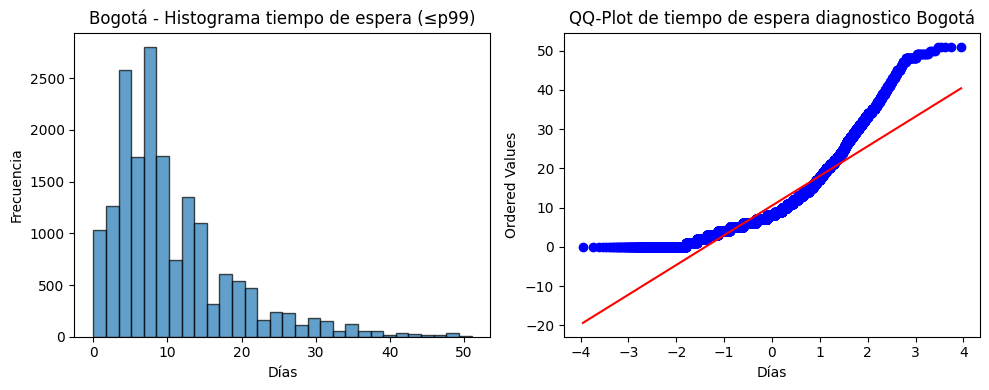

In [ ]:
espera_cali = cll_filtrado["tiempo_espera_dias"].dropna()
espera_bog  = bog_filtrado["tiempo_espera_dias"].dropna()

# Calcular percentil 99 para recorte
p99_cali = np.percentile(espera_cali, 99)
p99_bog  = np.percentile(espera_bog, 99)

# Recortar outliers
espera_cali_rec = espera_cali[espera_cali <= p99_cali]
espera_bog_rec  = espera_bog[espera_bog <= p99_bog]

# Graficar con axes Cali
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(espera_cali_rec, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Cali - Histograma tiempo de espera (≤p99)")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(espera_cali_rec, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot de tiempo de espera diagnostico   Cali")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()


# Graficar con axes Bogota
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(espera_bog_rec, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Bogotá - Histograma tiempo de espera (≤p99)")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(espera_bog_rec, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot de tiempo de espera diagnostico Bogotá")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()

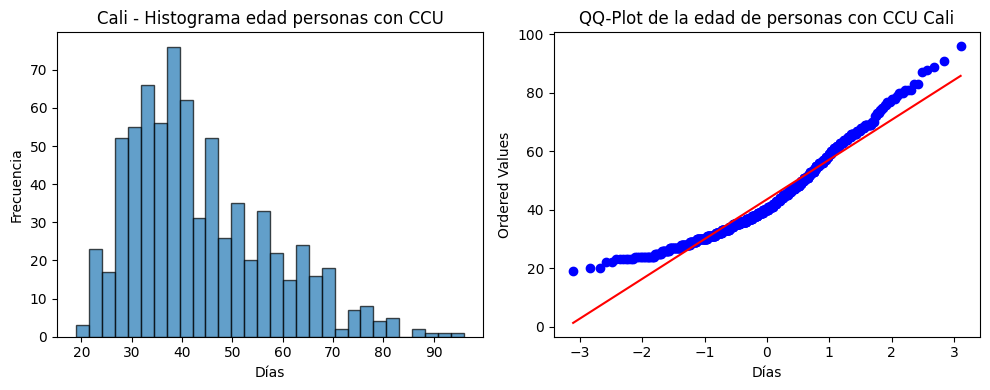

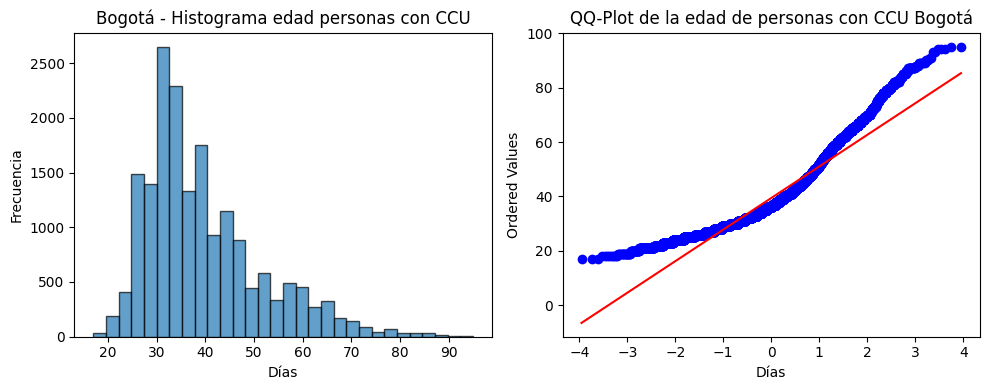

In [ ]:
espera_cali = cll_filtrado["edad"].dropna()
espera_bog  = bog_filtrado["edad"].dropna()


# Graficar con axes Cali
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(espera_cali, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Cali - Histograma edad personas con CCU")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(espera_cali, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot de la edad de personas con CCU Cali")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()


# Graficar con axes Bogota
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(espera_bog, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Bogotá - Histograma edad personas con CCU")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(espera_bog, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot de la edad de personas con CCU Bogotá")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()

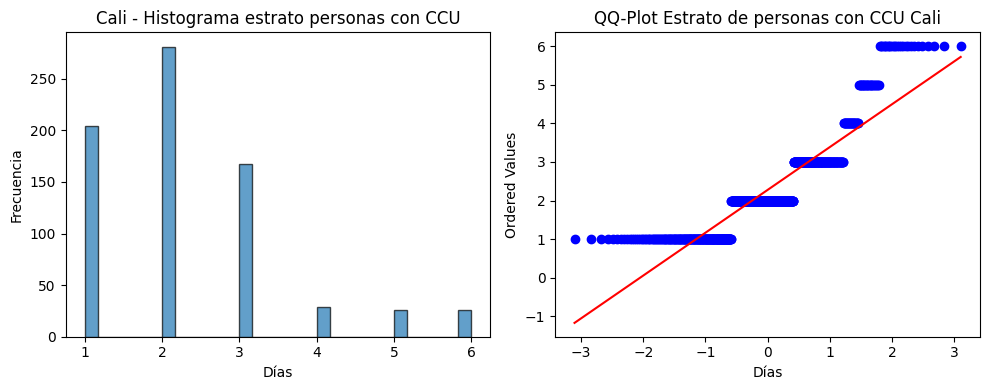

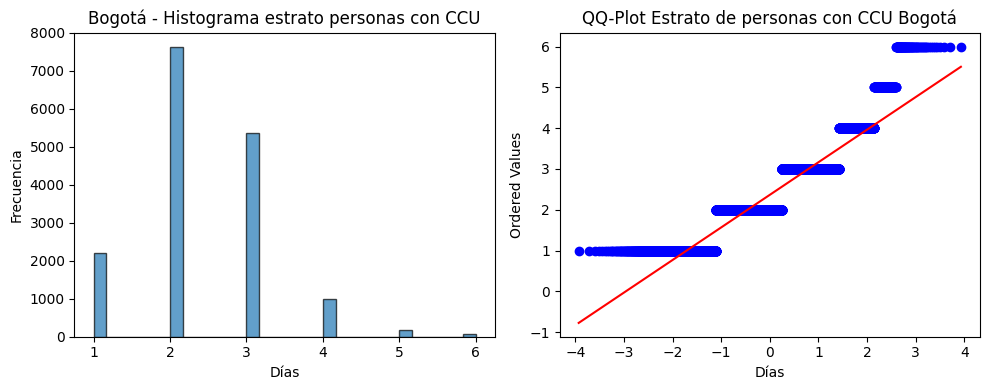

In [ ]:
estrato_cali = cll_filtrado["estrato"].dropna()
estrato_bog  = bog_filtrado["estrato"].dropna()


# Graficar con axes Cali
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(estrato_cali, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Cali - Histograma estrato personas con CCU")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(estrato_cali, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot Estrato de personas con CCU Cali")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()


# Graficar con axes Bogota
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(estrato_bog, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Bogotá - Histograma estrato personas con CCU")
axes[0].set_xlabel("Días")
axes[0].set_ylabel("Frecuencia")

stats.probplot(estrato_bog, dist="norm", plot=plt)
axes[1].set_title("QQ-Plot Estrato de personas con CCU Bogotá")
axes[1].set_xlabel("Días")

plt.tight_layout()
plt.show()

# **HIPÓTESIS CALI**


---



Hipótesis relacionadas con el régimen subsidiado de Cali.  


1.   H0: El régimen subsidiado tiene igual (o menor) tiempo de espera que los demás regímenes.
2.   H1: El régimen subsidiado tiene mayor tiempo de espera.


---






In [ ]:
sub_cali_regimen = cll_filtrado[cll_filtrado["regimen"].str.contains("subsidiado", case=False)]["tiempo_espera_dias"].dropna()
otros_cali_regimen = cll_filtrado[~cll_filtrado["regimen"].str.contains("subsidiado", case=False)]["tiempo_espera_dias"].dropna()

u1, p1 = stats.mannwhitneyu(sub_cali_regimen, otros_cali_regimen, alternative="two-sided")
print("H1 - Régimen subsidiado vs otros:")
print(f"Mediana Subsidiado: {sub_cali_regimen.median()}, Mediana Otros: {otros_cali_regimen.median()}")
print(f"Mann-Whitney U={u1:.1f}, p={p1:.4f}")


H1 - Régimen subsidiado vs otros:
Mediana Subsidiado: 13.0, Mediana Otros: 20.0
Mann-Whitney U=52758.0, p=0.0000


---
Hipótesis relacionadas con la prioridad de atención basado en la edad de Cali.

1.   H0: Las personas > 50 tienen menor tiempo de espera que ≤ 50.
2.   H1: Personas > 50 tienen mayor tiempo de espera.
---

In [ ]:


mayores50_cali = cll_filtrado[cll_filtrado["edad"] > 50]["tiempo_espera_dias"].dropna()
menores50_cali = cll_filtrado[cll_filtrado["edad"] < 50]["tiempo_espera_dias"].dropna()

u2, p2 = stats.mannwhitneyu(mayores50_cali, menores50_cali, alternative="two-sided")
print("H1 - Mayores de 50 vs menores de 50:")
print(f"Mediana >50: {mayores50_cali.median()}, Mediana < 50: {menores50_cali.median()}")
print(f"Mann-Whitney U={u2:.1f}, p={p2:.4f}")


H1 - Mayores de 50 vs menores de 50:
Mediana >50: 19.0, Mediana < 50: 15.0
Mann-Whitney U=57827.5, p=0.0382




---


Hipótesis relacionadas con la prioridad de atención basado en el estrato socio económico de Cali.  

1.   H0: Estratos 0–2 tienen igual o menor tiempo de espera que estratos 3–6.
2.   H1: Estratos 0–2 tienen mayor tiempo de espera.

---





In [ ]:


estratos_bajos_cali = cll_filtrado[cll_filtrado["estrato"].between(0,2)]["tiempo_espera_dias"].dropna()
estratos_altos_cali = cll_filtrado[cll_filtrado["estrato"].between(3,6)]["tiempo_espera_dias"].dropna()

u3, p3 = stats.mannwhitneyu(estratos_bajos_cali, estratos_altos_cali, alternative="two-sided")
print("\nH3 - Estrato 0–2 vs 3–6:")
print(f"Mediana bajos: {estratos_bajos_cali.median()}, Mediana altos: {estratos_altos_cali.median()}")
print(f"Mann-Whitney U={u3:.1f}, p={p3:.4f}")



H3 - Estrato 0–2 vs 3–6:
Mediana bajos: 15.0, Mediana altos: 19.0
Mann-Whitney U=52604.0, p=0.0049




---
Hipótesis para determinar si las personas que viven en estatos 0-2 que presentan demoras en el servicio pertenecen a un régimen subsidiado.  


1.   H0: La proporción de personas con régimen subsidiado es igual en estratos bajos (0–2) y altos (3–6).
2.   H1: Los estratos bajos tienen mayor proporción en el régimen subsidiado.
---



In [ ]:
# Crear variable binaria de estrato (bajo=0-2, alto=3-6)
cll_filtrado["estrato_bajo"] = cll_filtrado["estrato"].apply(lambda x: "Bajo (0-2)" if 0 <= x <= 2 else "Alto (3-6)")

# Crear variable binaria de régimen
cll_filtrado["regimen_cat"] = cll_filtrado["regimen"].apply(lambda x: "Subsidiado" if isinstance(x,str) and "subsidiado" in x.lower() else "No subsidiado")

# Tabla de contingencia
tabla = pd.crosstab(cll_filtrado["estrato_bajo"], cll_filtrado["regimen_cat"])
print("\nTabla de contingencia:\n", tabla)

# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi2={chi2:.2f}, p={p:.4f}")

# Si alguna celda <5 usar prueba exacta de Fisher
if (tabla.values < 5).any():
    oddsratio, p_fisher = fisher_exact(tabla)
    print(f"Fisher Exact Test: OR={oddsratio:.2f}, p={p_fisher:.4f}")


#en el resultado se confirma que los estratos bajos tienen mayor proporcion de personas afiliadas al regimen subsidiado


Tabla de contingencia:
 regimen_cat   No subsidiado  Subsidiado
estrato_bajo                           
Alto (3-6)              146         102
Bajo (0-2)              214         271

Chi2=13.70, p=0.0002


# **HIPÓTESIS BOGOTÁ**


---




Hipótesis relacionadas con el régimen subsidiado de Cali.


1.   H0: El régimen subsidiado tiene igual (o menor) tiempo de espera que los demás regímenes.
2.   H1: El régimen subsidiado tiene mayor tiempo de espera.



---





In [ ]:
sub_bog = bog_filtrado[bog_filtrado["regimen"].str.contains("subsidiado", case=False)]["tiempo_espera_dias"].dropna()
otros_bog = bog_filtrado[~bog_filtrado["regimen"].str.contains("subsidiado", case=False)]["tiempo_espera_dias"].dropna()

u1, p1 = stats.mannwhitneyu(sub_bog, otros_bog, alternative="two-sided")
print("H1 - Régimen subsidiado vs otros:")
print(f"Mediana Subsidiado: {sub_bog.median()}, Mediana Otros: {otros_bog.median()}")
print(f"Mann-Whitney U={u1:.1f}, p={p1:.4f}")

H1 - Régimen subsidiado vs otros:
Mediana Subsidiado: 7.0, Mediana Otros: 9.0
Mann-Whitney U=19880987.0, p=0.0000




---


Hipótesis relacionadas con la prioridad de atención basado en la edad de Bogotá.


1.   H0: Las personas > 50 tienen menor tiempo de espera que ≤ 50.
2.   H1: Personas > 50 tienen mayor tiempo de espera.



---





In [ ]:
mayores50_bog= bog_filtrado[bog_filtrado["edad"] > 50]["tiempo_espera_dias"].dropna()
menores50_bog = bog_filtrado[bog_filtrado["edad"] < 50]["tiempo_espera_dias"].dropna()

u2, p2 = stats.mannwhitneyu(mayores50_bog, menores50_bog, alternative="two-sided")
print("H1 - Mayores de 50 vs menores de 50:")
print(f"Mediana >50: {mayores50_bog.median()}, Mediana < 50: {menores50_bog.median()}")
print(f"Mann-Whitney U={u2:.1f}, p={p2:.4f}")

H1 - Mayores de 50 vs menores de 50:
Mediana >50: 8.0, Mediana < 50: 8.0
Mann-Whitney U=22329329.0, p=0.0820




---


Hipótesis relacionadas con la prioridad de atención basado en el estrato socio económico de Bogotá.


1.   H0: Estratos 0–2 tienen igual (o menor) tiempo de espera que estratos 3–6.
2.   H1: Estratos 0–2 tienen mayor tiempo de espera.



---




In [ ]:
estratos_bajos_bog = bog_filtrado[bog_filtrado["estrato"].between(0,2)]["tiempo_espera_dias"].dropna()
estratos_altos_bog = bog_filtrado[bog_filtrado["estrato"].between(3,6)]["tiempo_espera_dias"].dropna()

u3, p3 = stats.mannwhitneyu(estratos_bajos_bog, estratos_altos_bog, alternative="two-sided")
print("\nH3 - Estrato 0–2 vs 3–6:")
print(f"Mediana bajos: {estratos_bajos_bog.median()}, Mediana altos: {estratos_altos_bog.median()}")
print(f"Mann-Whitney U={u3:.1f}, p={p3:.4f}")


H3 - Estrato 0–2 vs 3–6:
Mediana bajos: 9.0, Mediana altos: 8.0
Mann-Whitney U=33243630.5, p=0.0053




---


Hipótesis para determinar si las personas que viven en estatos 0-2 que presentan demoras en el servicio pertenecen a un régimen subsidiado.

1.   H0: La proporción de personas con régimen subsidiado es igual en estratos bajos (0–2) y altos (3–6).
2.   H1: Los estratos bajos tienen mayor proporción en el régimen subsidiado.


---






In [ ]:
# Crear variable binaria de estrato (bajo=0-2, alto=3-6)
bog_filtrado["estrato_bajo"] = bog_filtrado["estrato"].apply(lambda x: "Bajo (0-2)" if 0 <= x <= 2 else "Alto (3-6)")

# Crear variable binaria de régimen
bog_filtrado["regimen_cat"] = bog_filtrado["regimen"].apply(lambda x: "Subsidiado" if isinstance(x,str) and "subsidiado" in x.lower() else "No subsidiado")

# Tabla de contingencia
tabla = pd.crosstab(bog_filtrado["estrato_bajo"], bog_filtrado["regimen_cat"])
print("\nTabla de contingencia:\n", tabla)

# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi2={chi2:.2f}, p={p:.4f}")

# Si alguna celda <5 usar prueba exacta de Fisher
if (tabla.values < 5).any():
    oddsratio, p_fisher = fisher_exact(tabla)
    print(f"Fisher Exact Test: OR={oddsratio:.2f}, p={p_fisher:.4f}")


#en el resultado se confirma que los estratos bajos tienen mayor proporcion de personas afiliadas al regimen subsidiado


Tabla de contingencia:
 regimen_cat   No subsidiado  Subsidiado
estrato_bajo                           
Alto (3-6)             7107        1094
Bajo (0-2)             7692        2123

Chi2=208.79, p=0.0000


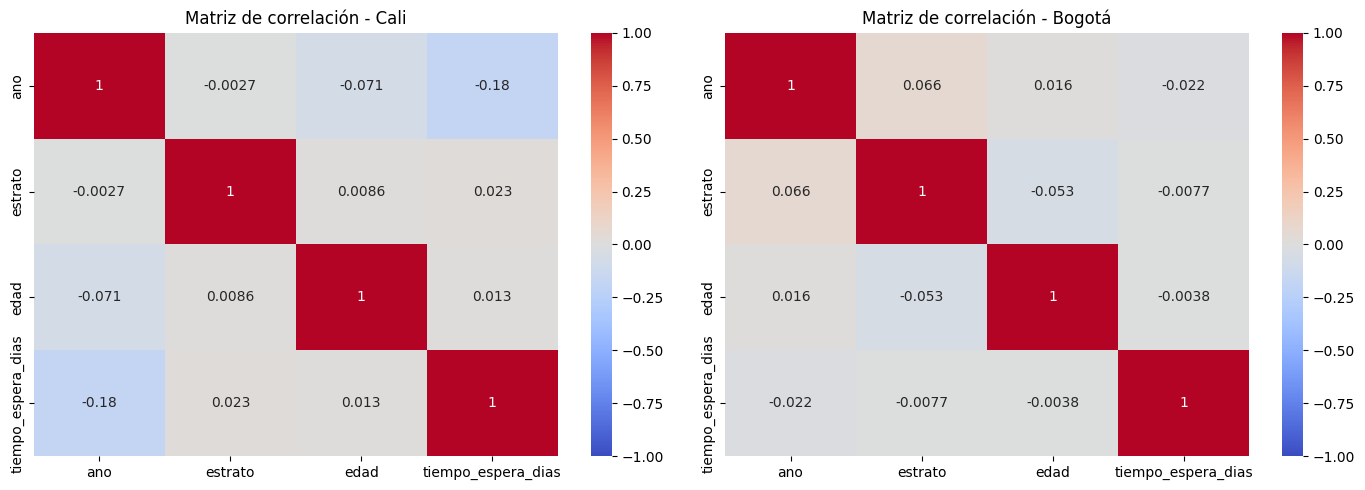

In [ ]:
# Selecciona solo columnas numéricas
num_df_cll = cll_filtrado.select_dtypes(include=["int64", "float64"])
num_df_bog = bog_filtrado.select_dtypes(include=["int64", "float64"])

# Matrices de correlación
corr_cll = num_df_cll.corr()
corr_bog = num_df_bog.corr()

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap Cali
sns.heatmap(corr_cll, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Matriz de correlación - Cali")

# Heatmap Bogotá
sns.heatmap(corr_bog, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Matriz de correlación - Bogotá")

plt.tight_layout()
plt.show()


# **CARGA DE DATOS**


---

In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd

#ajuste columas dataframe cali
cll["fecha_examen"] = pd.to_datetime(cll["fecha_examen"], errors="coerce").dt.date
cll["fecha_diag"] = pd.to_datetime(cll["fecha_diag"], errors="coerce").dt.date
cll["estrato"] = pd.to_numeric(cll["estrato"], errors="coerce").astype("Int64")
cll["edad"] = pd.to_numeric(cll["edad"], errors="coerce").astype("Int64")
cll["sexo"] = cll["sexo"].astype("string")
cll["ciudad"] = cll["ciudad"].astype("string")
cll["regimen"] = cll["regimen"].astype("string")
cll["etnia"] = cll["etnia"].astype("string")
cll["territorio"] = cll["territorio"].astype("string")


#ajuste columas dataframe bogota
bog["fecha_examen"] = pd.to_datetime(bog["fecha_examen"], errors="coerce").dt.date
bog["fecha_diag"] = pd.to_datetime(bog["fecha_diag"], errors="coerce").dt.date
bog["estrato"] = pd.to_numeric(bog["estrato"], errors="coerce").astype("Int64")
bog["edad"] = pd.to_numeric(bog["edad"], errors="coerce").astype("Int64")
bog["sexo"] = bog["sexo"].astype("string")
bog["ciudad"] = bog["ciudad"].astype("string")
bog["regimen"] = bog["regimen"].astype("string")
bog["etnia"] = bog["etnia"].astype("string")
bog["territorio"] = bog["territorio"].astype("string")


data_unificada = pd.concat([cll, bog], ignore_index=True)


In [ ]:
# ---------------------------------------------
# 1) Configuración
# ---------------------------------------------
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()
project_id = "analisis-ccu"
dataset_id = "Datos_CCU"      # <-- Usa el dataset que CREASTE en BigQuery

client = bigquery.Client(project=project_id)

# (Opcional) crea el dataset si no existe
dataset_ref = bigquery.Dataset(f"{project_id}.{dataset_id}")
dataset_ref.location = "southamerica-east1"  #se escogio esta region porque es la mas cercana a colombia
client.create_dataset(dataset_ref, exists_ok=True)

# Table IDs correctos (project.dataset.table)
table_id_cal = f"{project_id}.{dataset_id}.CCU_Cali"
table_id_bog = f"{project_id}.{dataset_id}.CCU_Bogota"
table_id =  f"{project_id}.{dataset_id}.Fact_data_CCU"

# 2) Esquema datos
schema = [
    bigquery.SchemaField("ciudad", "STRING"),
    bigquery.SchemaField("ano", "INTEGER"),
    bigquery.SchemaField("estrato", "INTEGER"),
    bigquery.SchemaField("regimen", "STRING"),
    bigquery.SchemaField("etnia", "STRING"),
    bigquery.SchemaField("fecha_examen", "DATE"),
    bigquery.SchemaField("fecha_diag", "DATE"),
    bigquery.SchemaField("territorio", "STRING"),
    bigquery.SchemaField("edad", "INTEGER"),
    bigquery.SchemaField("sexo", "STRING"),
]

job_config = bigquery.LoadJobConfig(
    schema=schema,
    write_disposition="WRITE_TRUNCATE",  # usa WRITE_APPEND si quieres anexar
)

# 3) Cargar DataFrames

#job_cali = client.load_table_from_dataframe(cll_filtrado, table_id_cal, job_config=job_config)
#job_cali.result()
#print("✅ Cali cargado en:", table_id_cal)

#job_bog = client.load_table_from_dataframe(bog_filtrado, table_id_bog, job_config=job_config)
#job_bog.result()
#print("✅ Bogotá cargado en:", table_id_bog)

job = client.load_table_from_dataframe(data_unificada, table_id, job_config=job_config)
job.result()
print("✅ df unificadso cargado en:", table_id_bog)

✅ df unificadso cargado en: analisis-ccu.Datos_CCU.CCU_Bogota
